In [1]:
%matplotlib inline

# install mongo client
!pip install pymongo

import pandas as pd
from pymongo import MongoClient

In [2]:
# connect to mongo collection
client = MongoClient()
db = client['capstone']
articles_collection = db.articles

In [31]:
# create dataframe from articles collection
terrorist_articles = articles_collection.find({'query': 'terrorist'})
terrorist_df = pd.DataFrame(list(terrorist_articles))
terrorist_df.head()

,_id,apiUrl,fields,id,isHosted,query,sectionId,sectionName,type,webPublicationDate,webTitle,webUrl
0,58f4f892e9b55e9a8225dfc1,https://content.guardianapis.com/world/2013/ju...,"{u'body': u'<p>It is extraordinary, when the U...",world/2013/jul/03/sovereignty-stake-snowden-saga,False,terrorist,us-news,US news,article,2013-07-03T20:41:00Z,Letters: Sovereignty at stake in Snowden saga,https://www.theguardian.com/world/2013/jul/03/...
1,58f4f892e9b55e9a8225dfc2,https://content.guardianapis.com/film/2013/jun...,"{u'body': u'<h2><a href=""http://www.youtube.co...",film/2013/jun/29/this-weeks-new-films,False,terrorist,film,Film,article,2013-06-29T05:00:11Z,"The Act Of Killing, This Is The End, Despicabl...",https://www.theguardian.com/film/2013/jun/29/t...
2,58f4f892e9b55e9a8225dfc3,https://content.guardianapis.com/uk/2013/mar/0...,{u'body': u'<p>A parliamentary byelection in M...,uk/2013/mar/03/mid-ulster-elections-sinn-fein-...,False,terrorist,uk-news,UK news,article,2013-03-03T15:43:29Z,Troubles haunt Mid Ulster byelection,https://www.theguardian.com/uk/2013/mar/03/mid...
3,58f4f892e9b55e9a8225dfc4,https://content.guardianapis.com/global-develo...,{u'body': u'<p>Somalis have expressed their fe...,global-development/2013/jun/24/somalis-barclay...,False,terrorist,global-development,Global development,article,2013-06-24T15:47:57Z,Somalis fear Barclays closure of remittance ac...,https://www.theguardian.com/global-development...
4,58f4f892e9b55e9a8225dfc5,https://content.guardianapis.com/politics/2013...,{u'body': u'<p>Tony Blair has admitted that li...,politics/2013/feb/26/tony-blair-iraq-bbc-newsn...,False,terrorist,politics,Politics,article,2013-02-26T22:49:36Z,Tony Blair says Iraq would be far worse today ...,https://www.theguardian.com/politics/2013/feb/...


In [32]:
# add column with datetime format converted from timestamp
terrorist_df['date'] = pd.to_datetime(terrorist_df['webPublicationDate'])

In [33]:
# group by year-month
terrorist_df['year-month'] = terrorist_df.date.dt.year.astype(str) + '-' + terrorist_df.date.dt.month.astype(str)
grouped = terrorist_df.groupby('year-month')
grouped.count()

,_id,apiUrl,fields,id,isHosted,query,sectionId,sectionName,type,webPublicationDate,webTitle,webUrl,date
year-month,,,,,,,,,,,,,
1948-5,1,1,1,1,1,1,1,1,1,1,1,1,1
1949-1,1,1,1,1,1,1,1,1,1,1,1,1,1
1973-9,1,1,1,1,1,1,1,1,1,1,1,1,1
1974-5,1,1,1,1,1,1,1,1,1,1,1,1,1
1974-6,1,1,1,1,1,1,1,1,1,1,1,1,1
1975-11,1,1,1,1,1,1,1,1,1,1,1,1,1
1975-9,1,1,1,1,1,1,1,1,1,1,1,1,1
1976-10,1,1,1,1,1,1,1,1,1,1,1,1,1
1976-7,1,1,1,1,1,1,1,1,1,1,1,1,1


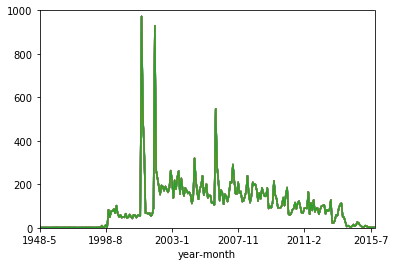

In [41]:
grouped.count().plot(legend=False, ylim=(0,1000))

In [35]:
# which section the article is in - grouping by sectionName
sections = terrorist_df.groupby('sectionName')
sections.count().sort_values('id', ascending=False)

,_id,apiUrl,fields,id,isHosted,query,sectionId,type,webPublicationDate,webTitle,webUrl,date,year-month
sectionName,,,,,,,,,,,,,
World news,8045,8045,8045,8045,8045,8045,8045,8045,8045,8045,8045,8045,8045
UK news,3957,3957,3957,3957,3957,3957,3957,3957,3957,3957,3957,3957,3957
Politics,2490,2490,2490,2490,2490,2490,2490,2490,2490,2490,2490,2490,2490
Opinion,2406,2406,2406,2406,2406,2406,2406,2406,2406,2406,2406,2406,2406
Business,1336,1336,1336,1336,1336,1336,1336,1336,1336,1336,1336,1336,1336
US news,1256,1256,1256,1256,1256,1256,1256,1256,1256,1256,1256,1256,1256
Media,1132,1132,1132,1132,1132,1132,1132,1132,1132,1132,1132,1132,1132
Books,691,691,691,691,691,691,691,691,691,691,691,691,691
Film,522,522,522,522,522,522,522,522,522,522,522,522,522
